# Check that Python is 3.8, 2022-07-25

In [1]:
import sys
print( sys.version )

3.8.10 (default, Jun 22 2022, 20:18:18) 
[GCC 9.4.0]


# OGRE-Jupyter Interaction
### https://github.com/OGRECave/ogre/blob/master/Samples/Python/numpy_sample.ipynb

## Kick off OGRE window from Jupyter

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import Ogre
import Ogre.Bites
import Ogre.RTShader

class Application(Ogre.Bites.ApplicationContextBase):
    def __init__(self):
        Ogre.Bites.ApplicationContextBase.__init__(self, "OgreColab")

    def oneTimeConfig(self):
        rs = self.getRoot().getRenderSystemByName("OpenGL 3+ Rendering Subsystem")
        self.getRoot().setRenderSystem(rs)
        return True

    def pollEvents(self):
        pass


ctx = Application()
ctx.initApp()
root = ctx.getRoot()

scn_mgr = root.createSceneManager()

shadergen = Ogre.RTShader.ShaderGenerator.getSingleton()
shadergen.addSceneManager(scn_mgr)

# no RenderWindows are available here, so create an offscreen rendertarget and use that
w, h = 640, 480
tex = Ogre.TextureManager.getSingleton().createManual(
    "target", Ogre.RGN_DEFAULT, Ogre.TEX_TYPE_2D, w, h, 0, Ogre.PF_BYTE_RGB,
    Ogre.TU_RENDERTARGET, None)
win = tex.getBuffer().getRenderTarget()

Creating resource group General
Creating resource group OgreInternal
Creating resource group OgreAutodetect
SceneManagerFactory for type 'DefaultSceneManager' registered.
Registering ResourceManager for type Material
Registering ResourceManager for type Mesh
Registering ResourceManager for type Skeleton
MovableObjectFactory for type 'ParticleSystem' registered.
ArchiveFactory for type 'FileSystem' registered
ArchiveFactory for type 'Zip' registered
ArchiveFactory for type 'EmbeddedZip' registered
DDS codec registering
ETC codec registering
ASTC codec registering
Registering ResourceManager for type GpuProgram
Registering ResourceManager for type Compositor
MovableObjectFactory for type 'Entity' registered.
MovableObjectFactory for type 'Light' registered.
MovableObjectFactory for type 'BillboardSet' registered.
MovableObjectFactory for type 'ManualObject' registered.
MovableObjectFactory for type 'BillboardChain' registered.
MovableObjectFactory for type 'RibbonTrail' registered.
Movab

xel GL_ARB_half_float_vertex GL_ARB_imaging GL_ARB_indirect_parameters GL_ARB_instanced_arrays GL_ARB_internalformat_query GL_ARB_internalformat_query2 GL_ARB_invalidate_subdata GL_ARB_map_buffer_alignment GL_ARB_map_buffer_range GL_ARB_multi_bind GL_ARB_multi_draw_indirect GL_ARB_multisample GL_ARB_multitexture GL_ARB_occlusion_query GL_ARB_occlusion_query2 GL_ARB_parallel_shader_compile GL_ARB_pipeline_statistics_query GL_ARB_pixel_buffer_object GL_ARB_point_parameters GL_ARB_point_sprite GL_ARB_polygon_offset_clamp GL_ARB_post_depth_coverage GL_ARB_program_interface_query GL_ARB_provoking_vertex GL_ARB_query_buffer_object GL_ARB_robust_buffer_access_behavior GL_ARB_robustness GL_ARB_sample_locations GL_ARB_sample_shading GL_ARB_sampler_objects GL_ARB_seamless_cube_map GL_ARB_seamless_cubemap_per_texture GL_ARB_separate_shader_objects GL_ARB_shader_atomic_counter_ops GL_ARB_shader_atomic_counters GL_ARB_shader_ballot GL_ARB_shader_bit_encoding GL_ARB_shader_clock GL_ARB_shader_draw_p

## Generate graphics in the BG and display image within Jupyter

Texture 'gradient': Loading 1 faces(PF_B8G8R8,256x256x1) with 8 hardware generated mipmaps from Image. Internal format is PF_B8G8R8,256x256x1.


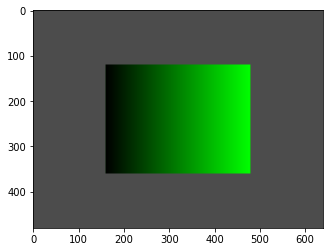

In [3]:


# this is the same code as in the numpy_sample.py example
cam = scn_mgr.createCamera("myCam")
vp = win.addViewport(cam)

# create a numpy image
arr = np.zeros((256, 256, 3), dtype=np.uint8)
arr[:, :, 1] = np.mgrid[0:256, 0:256][1]

# convert to an Ogre image and create a texture out of it
ogre_img = Ogre.Image()
ogre_img.loadDynamicImage(arr, 256, 256, Ogre.PF_BYTE_RGB)

Ogre.TextureManager.getSingleton().loadImage("gradient", "General", ogre_img)

## apply texture to a rectangle
mat = Ogre.MaterialManager.getSingleton().create("gradient_mat", "General")
rpass = mat.getTechniques()[0].getPasses()[0]
rpass.setLightingEnabled(False)
rpass.createTextureUnitState("gradient")

rect = scn_mgr.createScreenSpaceRect(True)
rect.setCorners(-0.5, 0.5, 0.5, -0.5)  # in normalized screen space
rect.setMaterial(mat)

scn_mgr.getRootSceneNode().createChildSceneNode().attachObject(rect)

vp.setBackgroundColour((0.3, 0.3, 0.3))

win.update()

## read back the pixels to a numpy array
mem = np.empty((win.getHeight(), win.getWidth(), 3), dtype=np.uint8)
pb = Ogre.PixelBox(win.getWidth(), win.getHeight(), 1, Ogre.PF_BYTE_RGB, mem)
win.copyContentsToMemory(pb, pb)

plt.imshow(mem)

